Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **25 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Lance"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Deterministic Quicksort

## Question 1 [time estimate: 5 minutes]

Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

The array $A = [1,5,6,2,3,4,7,8,9]: \text{where } i = 7$

## Question 2 [time estimate: 7 minutes]

Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [6]:
steps = 0
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    global steps
    x = A[r] 
    i = p-1
    for j in range(p,r): 
        if A[j] <= x:
            i += 1 
            steps += 1
            A[i],A[j] = A[j],A[i]

    A[i+1],A[r] = A[r],A[i+1]

    return i+1

A = [1,5,6,2,3,8,9,4,7]

print(partition(A, 0, len(A)-1))

6


In [7]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3 [time estimate: 3 minutes]

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [13]:
def quick_sort(A,p,r):
    global steps
    if p < r:
        q = partition(A,p,r)
        quick_sort(A,p,q-1)
        quick_sort(A,q+1,r)
        
    return A 

In [14]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4 [time estimate: 10 minutes] 

Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


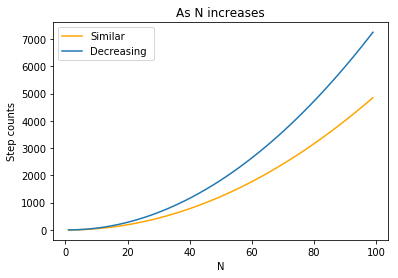

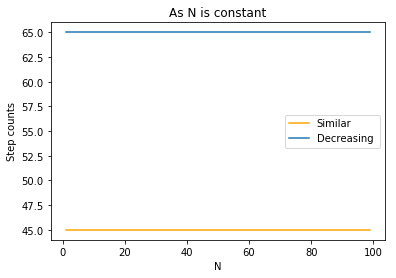

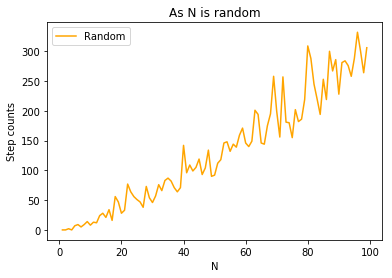

In [21]:
import matplotlib.pyplot as plt 
import numpy as np 
import statistics as stats 
import random 

A = [1,1,1]
quick_sort(A, 0, len(A) - 1)

similar = []
decreasing = []
N = []

limit = 100

for i in range(1,limit): 
    steps = 0
    A = [random.randrange(1,2) for j in range(i)] # generate list of the same numbers as n increases
    quick_sort(A,0,len(A) -1)
    similar.append(steps)
    
    B = np.arange(i,0,-1) # generate list of decreasing order as n increases
    quick_sort(B,0,len(A) -1)
    decreasing.append(steps)
    
    N.append(i)

plt.plot(N, similar, color = 'orange', label = "Similar")
plt.plot(N, decreasing, label = "Decreasing ")
plt.xlabel("N")
plt.ylabel("Step counts")
plt.title("As N increases")
plt.legend()
plt.show()

similar_2 = []
decreasing_2 = []
N_2 = []

for i in range(1,limit): 
    steps = 0
    A = [random.randrange(1,2) for j in range(10)] # generate list of the same numbers as n increases
    quick_sort(A,0,len(A) -1)
    similar_2.append(steps)
    
    B = np.arange(10,0,-1) # generate list of decreasing order as n increases
    quick_sort(B,0,len(A) -1)
    decreasing_2.append(steps)
    
    N_2.append(i)
    
plt.plot(N_2, similar_2, color = 'orange', label = "Similar")
plt.plot(N_2, decreasing_2, label = "Decreasing ")
plt.xlabel("N")
plt.ylabel("Step counts")
plt.title("As N is constant")
plt.legend()
plt.show()

random_list = []

N_2 = []

for i in range(1,limit): 
    steps = 0
    A = random.sample(range(i),i) # generate list of random numbers 
    quick_sort(A,0,len(A) -1)
    random_list.append(steps)
    
    N_2.append(i)
    
plt.plot(N_2, random_list, color = 'orange', label = "Random")
plt.xlabel("N")
plt.ylabel("Step counts")
plt.title("As N is random")
plt.legend()
plt.show()


